# 27회차 기출문제


## 문제 1

**Description**

신용카드 사기 탐지 모형 개발

-   amount : 거래금액

-   time : 거래된 기간

-   V1 \~ V17 : 비식별된 칼럼

In [1]:
import pandas as pd
import numpy as np
dat = pd.read_csv('problem1.csv')
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      1234 non-null   float64
 1   v2      1234 non-null   float64
 2   v3      1234 non-null   float64
 3   v4      1234 non-null   float64
 4   v5      1234 non-null   float64
 5   v6      1234 non-null   float64
 6   v7      1234 non-null   float64
 7   v8      1234 non-null   float64
 8   v9      1234 non-null   float64
 9   v10     1234 non-null   float64
 10  v11     1234 non-null   float64
 11  v12     1234 non-null   float64
 12  v13     1234 non-null   float64
 13  v14     1234 non-null   float64
 14  v15     1234 non-null   float64
 15  v16     1234 non-null   float64
 16  v17     1234 non-null   float64
 17  time    1234 non-null   int64  
 18  amount  1234 non-null   float64
 19  class   1234 non-null   int64  
dtypes: float64(18), int64(2)
memory usage: 192.9 KB


### 1. EDA를 실시하시오.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

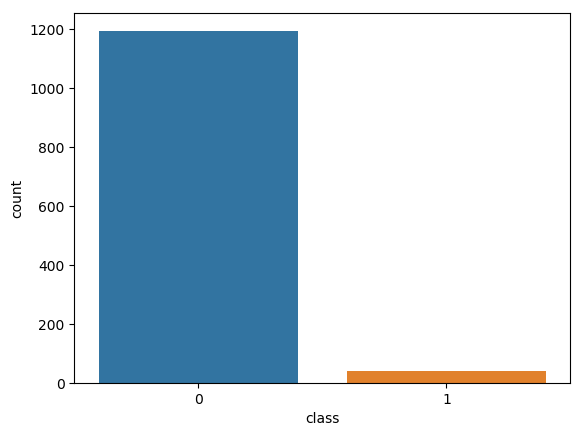

In [3]:
sns.countplot(dat['class']);
plt.show();

In [4]:
dat['class'].value_counts()

0    1193
1      41
Name: class, dtype: int64

class 변수의 경우 No의 비율이 매우 많으며, 클래스 불균형이 존재한다.



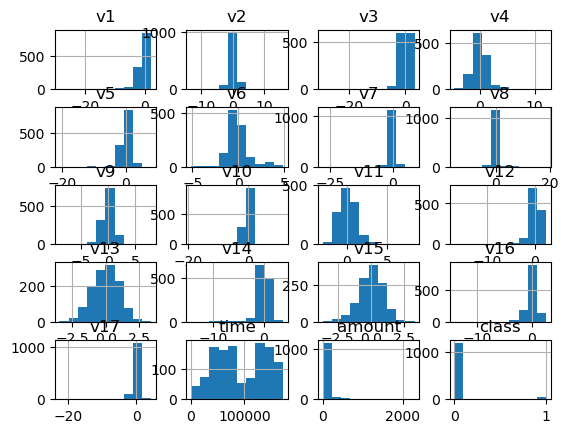

In [5]:
dat.select_dtypes('number').hist();
plt.show();

- 마스킹된 대부분의 변수들이 0을 중심으로 분포해있으며, 일부 변수의 경우 이상치가 존재한다.
- amount 변수의 경우 50000, 140000이 중심인 이봉 분포형태이다.

In [6]:
dat.isna().sum()

v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
time      0
amount    0
class     0
dtype: int64

데이터에 결측치는 존재하지 않는다.



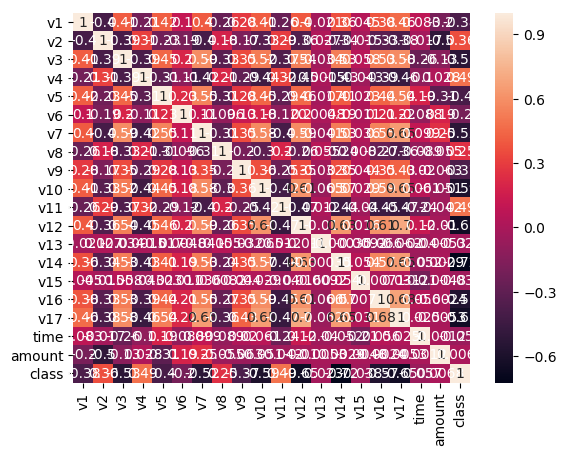

In [7]:
corr = dat.select_dtypes('number').corr()
sns.heatmap(corr, annot = True);
plt.show();

연속형 변수의 상관관계를 보면 마스킹된 대부분의 변수들 간 상관관계가 존재하는 것을 확인할 수 있다.

### 2. 차원축소가 필요한지 검토하시오. 2개 이상의 후보 알고리즘을 비교하고, 1개를 추천하시오.

차원 축소는 변수 간의 중복 정보 제거, 연산 속도 향상, 지도학습 모델 구축시 과적합 방지를 위해 활용할 수 있다. 차원 축소 기법 중 대표적인 방법으로 주성분분석(PCA), 커널 주성분분석(Kernel PCA)이 있으며, 차원 축소의 필요성은 각 변수 간의 상관관계를 보고 판단할 수 있다. EDA 과정에서 확인한 결과 마스킹된 대부분의 변수들 간 상관관계가 존재한다. 따라서 차원 축소를 고려한다.

**PCA**

주성분분석은 데이터의 정보를 최대한 보존하는 축으로 데이터를 사영시켜 차원을 축소하는 기법이다. 데이터에 비선형구조가 있을 경우 이를 고려할 수 없다는 단점이 있다.

**Kernel PCA**

주성분분석의 단점인 데이터의 비선형구조가 있을 경우 이를 고려할 수 없는 문제를 커널 트릭을 적용하여 고차원에 데이터를 매핑한 후 PCA를 적용함으로써, 데이터의 비선형구조를 고려할 수 있다. 적절한 커널 함수 선택과 커널 함수 내 파라미터 선택에 따라 성능이 유동적일 수 있으며, 계산량이 많아질 수 있다.

계산량이 비교적 적은 주성분분석을 고려한다.

### 3. 추천한 알고리즘을 구현하고, 정당성을 제시하시오.



주성분분석을 적용하기 전 훈련 데이터와 테스트 데이터를 분리한다. 층화 샘플링을 통해 훈련 데이터와 테스트 데이터를 7:3으로 분할한다.

In [8]:
from sklearn.model_selection import train_test_split
y = dat['class']
X = dat.drop(['class'], axis = 1)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

pca_pipe = Pipeline([("scaler", StandardScaler()), 
                     ("PCA", PCA(n_components= 0.8, svd_solver='full'))])
                     
preprocess1 = ColumnTransformer(
    [("num_process", pca_pipe, train_X.columns)]
)

PCA_result = preprocess1.fit_transform(train_X)
#kpca = preprocess1.named_transformers_['num_process']['KernelPCA']
pca_data = pd.DataFrame(PCA_result)                     
print(pca_data.head())

          0         1         2         3         4         5         6  \
0 -0.123574  0.105832  0.214086  0.070385 -0.880476 -1.144980 -0.397935   
1 -0.038110 -0.415980 -1.060493  0.220744  0.771979 -1.726060  0.842529   
2 -0.386854 -0.509217  1.442112  0.594375  0.211467 -0.214604  0.008447   
3 -0.280098 -0.425079  0.399121 -0.222978  0.524558 -0.314862 -0.450208   
4 -0.439778 -0.599239  0.941496  0.006958  0.691339  0.398022 -0.214162   

          7         8         9  
0  0.506939  1.009665  0.554121  
1 -0.395562  1.624482  0.118915  
2  0.727273  1.057658 -0.028510  
3 -0.244656  0.334364 -0.092446  
4 -0.358583  0.503637 -0.218099  


누적분산비율을 80%로 설정했을 때, PC0 ~ PC9이 선택된다.



### 4. Over sampling / under sampling의 장단점을 기술하시오. 적절한 샘플링을 제안하고 구현하시오.

**Over sampling**

오버샘플링은 소수 범주 내 관측치를 복원추출을 통해 늘리는 방법이다.

**장점**

언더샘플링처럼 데이터를 잃지 않고, 소수 범주를 잘 분류할 가능성이 있음

**단점**

소수 범주를 복원추출을 통해 값을 복제하므로, 소수 범주에 과적합될 수 있음

데이터의 크기가 증가하므로 모델 적합시 계산량이 더 많아짐

In [10]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')
train_X_over, train_y_over = oversample.fit_resample(train_X, train_y)
print(Counter(train_y_over))

Counter({0: 833, 1: 833})


**Under sampling**

언더 샘플링은 다수 범주의 관측치를 랜덤 샘플링을 통해 일부만 추출하므로써 다수 범주의 빈도를 줄이는 방법이다.

**장점**

랜덤샘플링을 통해 다수 범주의 관측치를 제거하기 때문에 모델 적합시 계산 속도가 향상됨

**단점**

관측치를 제거하기 때문에 정보의 손실 발생함

In [11]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
undersample = RandomUnderSampler(sampling_strategy='majority')
train_X_under, train_y_under = undersample.fit_resample(train_X, train_y)
print(Counter(train_y_under))

Counter({0: 30, 1: 30})


타겟인 class 변수에 클래스 불균형이 심하므로, 오버샘플링을 적용한다.


### 5. 이전 결과를 활용하여 사기 분류 모델 2개를 구현하고 성능을 비교하시오.

5-fold 교차검증을 통해 validation 데이터를 여러번 생성 후 적합하여, 하이퍼파라미터별 모형 성능을 검증한다. 모델은 랜덤포레스트 모델과 의사결정나무 모델을 적합한다.

In [12]:
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold

pipe_rf = Pipeline(
    [
        ("preprocess", preprocess1),
        ("smote", RandomOverSampler(sampling_strategy='minority')),
        ("classifier", RandomForestClassifier())
    ]
)

RandomForest_param = {'classifier__max_features': np.arange(0.1, 1, 0.1)}
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)

RandomForest_search = GridSearchCV(estimator = pipe_rf, 
                      param_grid = RandomForest_param, 
                      cv = cv,
                      scoring = 'roc_auc') 
RandomForest_search.fit(train_X, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_process',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('PCA',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'time', 'amount'],
      dtype='object'))])),
               

In [13]:
print('Random Forest best score : ', RandomForest_search.best_score_)

Random Forest best score :  0.9613090255648293


교차검증 score(AUC score)를 바탕으로 모델별로 성능을 비교해보면 ramdom forest 모형이 가장 우수한 것을 확인할 수 있다. 따라서 최종 모형으로 Random forest 모형을 선택한다.

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
pred_rf = RandomForest_search.predict(test_X)
print(classification_report(test_y, pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       360
           1       1.00      0.82      0.90        11

    accuracy                           0.99       371
   macro avg       1.00      0.91      0.95       371
weighted avg       0.99      0.99      0.99       371



In [15]:
print(roc_auc_score(test_y, pred_rf))

0.9090909090909092


### 6. 이상탐지(anomaly detection) 방법을 사용하여 신용카드 사기 데이터를 식별하시오.

- 1) 2개 이상 탐지 방법(후보 알고리즘)을 도출하여 장단점을 비교하시오.

이상치 탐지 방법은 boxplot을 이용한 방법과 군집 알고리즘 중 DBSCAN 알고리즘을 이용한 방법이 있습니다.

**boxplot**

boxplot을 이용한 접근 방법은 울타리 밖의 관측치를 이상치로 정의합니다.

울타리는 다음과 같이 정의됩니다.

위 울타리(upper fence) : Q3+ 1.5* IQR

아래 울타리(lower fence) : Q1- 1.5* IQR

장점은 일변량 변수의 통계량을 이용한 접근 방법이므로 계산량이 적고, 쉽게 이상치를 식별할 수 있습니다. 단점은 일변량 분포의 정보만 활용가능합니다.

**DBSCAN**

DBSCAN(밀도 기반 클러스터링 기법)은 밀집된 데이터 포인트를 클러스터로 묶는 비지도 학습 알고리즘입니다. 사용자는 최소 이웃 수와 거리 기준을 설정하여 밀도 기반으로 군집을 정의합니다.

장점은 다변량 정보를 활용하며, 기하학적인 정보를 갖는 형태에서도 군집 성능이 우수합니다. 단점은 모델 파라미터에 따라 이상 탐지 성능이 유동적입니다. 모델 파라미터에 따라 이상치 탐지의 성능이 유동적인 문제를 보완하기 위해 k-nearest neighbor distance(euclidean distance 이용)를 이용하여, elbow point를 정함으로써 단점을 보완할 수 있습니다.

따라서 DBSCAN 알고리즘을 선택합니다.

- 2)3번에서 구현했던 전처리 데이터를 활용하여 이상탐지 모델을 구현하시오.

In [16]:
PCA_train_X = pd.DataFrame(preprocess1.fit_transform(train_X))
PCA_test_X = pd.DataFrame(preprocess1.transform(test_X))

pca_train = pd.concat([PCA_train_X, train_y.reset_index(drop = True)], axis = 1)
pca_test = pd.concat([PCA_test_X, test_y.reset_index(drop = True)], axis = 1)

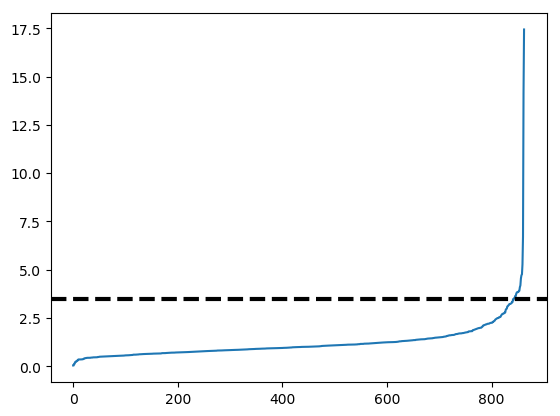

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors 
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(pca_train)

distances, indices = neighbors_fit.kneighbors(pca_train)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);
plt.axhline(y=3.5, color='black', linestyle='--', linewidth=3);
plt.show();

In [18]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3.5, min_samples=20).fit(pca_train)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
pred = db.fit_predict(pca_test)
print('pred outlier count : ', list(pred).count(-1))

pred outlier count :  16


In [19]:
pred = pd.DataFrame(pred.reshape(-1, 1), columns = ['outlier'])
pred = pred.replace(-1, 1)

db_result = pd.concat([test_y.reset_index(drop = True), pred.reset_index(drop = True)], axis = 1)
print(classification_report(db_result['class'], db_result['outlier']))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       360
           1       0.56      0.82      0.67        11

    accuracy                           0.98       371
   macro avg       0.78      0.90      0.83       371
weighted avg       0.98      0.98      0.98       371



- 3)분류 모형과 이상 탐지 모형을 비교하고, 분석가로서 종합적인 결론을 제시하시오.

모형 성능 측면에서 보면 anomaly detection 방법을 적용한 것에 비해 supervised learning으로 학습한 모형의 성능이 미미하게 우수하지만, 큰 차이는 없었다.

anomaly detection과 supervised learning을 비교해보면 두 방법론 다 반응변수의 불균형이 심할 때, 적용할 수 있는 방법이다. 차이점은 anomaly detection의 경우 타겟이 없어도 적용할 수 있는 방법이다.

신용카드 사기 탐지 여부를 탐지하는 모형을 운영하는 관점에서 봤을 때, 타겟이 있는 과거 데이터를 활용할 수 있으므로, supervised learnig으로 학습한 모형을 활용하는 것이 적절할 수 있다.

## 2 문제 2(변형 문제)

In [20]:
dat = pd.read_csv('problem2.csv')
dat.head()

,...1,id,gender,math,daysabs,prog
0,1,1001,male,63,4,Academic
1,2,1002,male,27,4,Academic
2,3,1003,female,20,2,Academic
3,4,1004,female,16,3,Academic
4,5,1005,female,2,3,Academic


In [21]:
dat.info()
dat = dat.drop(columns=dat.columns[:2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ...1     314 non-null    int64 
 1   id       314 non-null    int64 
 2   gender   314 non-null    object
 3   math     314 non-null    int64 
 4   daysabs  314 non-null    int64 
 5   prog     314 non-null    object
dtypes: int64(4), object(2)
memory usage: 14.8+ KB


### 1.데이터가 과대산포 되어있는지 확인하시오.


In [22]:
variance = np.var(dat['daysabs'])
mean = np.mean(dat['daysabs'])
dispersion_ratio = variance / mean
print(f'과대산포 여부 확인: {dispersion_ratio}')

과대산포 여부 확인: 8.288436254640827


평균에 비해 분산이 약 8배 높으므로, 과대산포 되어있다.



### 2. 포아송 회귀 모델과 음이항 회귀 모델 중 적합한 모델을 선택하고, 이유를 기술하시오.


포아송 회귀 모델은 포아송 분포 가정 하에 타겟에 과대산포가 존재하지 않아야 한다. 해당 데이터는 과대산포가 존재하므로, 과대산포를 반영할 수 있는 음이항 모델을 고려한다.

### 3. 모델 적합도 검정을 수행하시오.

- 귀무가설: 모든 계수들이 0이다.
- 대립가설: 0이 아닌 계수가 존재한다.

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

fit = smf.glm('daysabs ~ gender + math + prog', 
              data=dat, 
              family=sm.families.NegativeBinomial()).fit()

# null deviance와 deviance 계산
null_deviance = fit.null_deviance
deviance = fit.deviance
test_statistic = round(null_deviance - deviance, 3)

# 자유도 계산
df = fit.df_model
p_value = stats.chi2.sf(test_statistic, df)
print(f"모델 적합도 검정 p-value: {p_value}")

모델 적합도 검정 p-value: 2.2337202493553e-14


유의수준 5%에서 p-value = 5.80938e-15이므로 귀무가설을 기각한다. 따라서 모델에 0이 아닌 계수가 존재하므로, 모델이 데이터에 적합하다고 결론지을 수 있다.

### 4. 각 회귀계수의 통계적 유의성에 관해 기술하시오.


- 귀무가설 : 해당 회귀계수가 0이다.
- 대립가설 : 해당 회귀계수가 0이 아니다.

In [24]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                daysabs   No. Observations:                  314
Model:                            GLM   Df Residuals:                      309
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -864.25
Date:                Mon, 02 Jun 2025   Deviance:                       348.13
Time:                        08:13:38   Pearson chi2:                     333.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1999
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.2825      0.150     15.255      0.000       1.989       2.576
gender[T.male]        -0.2108      0.124     -1.695      0.090      -0.454       0.033
prog[T.General]        0.4245      0.186      2.288      0.022       0.061       0.788
prog[T.Vocational]    -0.8279      0.146     -5.672      0.000      -1.114      -0.542
math                  -0.0062      0.003     -2.451      0.014      -0.011      -0.001
======================================================================================
"""

유의수준 5%에서 수학성적, 진학 프로그램의 p-value가 작으므로 귀무가설을 기각한다. 따라서 수학성적과 진학 프로그램은 결석 일수와 통계적으로 유의미한 관계가 있다.

유의수준 5%에서 성별의 p-value = 0.09로 크므로 귀무가설을 기각할 수 없다. 따라서 성별은 결석 일수와 통계적으로 유의미한 관계가 없다.

## 문제 3

2년 전 회사 매출이 200,000달러, 1년 전 회사 매출이 300,000달러, 그 후 서비스 품질의 개선으로 회사 매출이 500,000달러가 되었을 때, 연평균 매출 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기)

In [25]:
initial_value = 200000
final_value = 500000
years = 2
cagr = (final_value / initial_value) ** (1 / years) - 1
cagr_percentage = round(cagr * 100, 2)
print(f"{cagr_percentage}%")

58.11%


## 문제 4

어느 대학교에서 무작위로 뽑은 20명의 학생들이 매주 운동하는 평균 시간이 
시간으로 측정되었다. 해당 데이터의 표본 분산은 
이다. 이 데이터를 바탕으로, 95% 신뢰수준에서 학생들이 매주 운동하는 시간의 모평균에 대한 신뢰구간을 구하시오.

In [26]:
import math
import scipy.stats as stats

# mean_x = 6.2
# variance_s2 = 1.5**2
# n = 20
# alpha = 0.05
# 
# std_dev = math.sqrt(variance_s2)
# df = n - 1
# 
# t_value = stats.t.ppf(1 - alpha / 2, df)
# 
# se = std_dev / math.sqrt(n)
# 
# lower_bound = mean_x - t_value * se
# upper_bound = mean_x + t_value * se
# print(f"신뢰구간: ({lower_bound:.4f}, {upper_bound:.4f})")

mean_x = 6.2
variance_s2 = 1.5**2
n = 20
alpha = 0.05

std_dev = math.sqrt(variance_s2)
confidence_interval = stats.t.interval(1 - alpha, df=n-1, loc=mean_x, scale=std_dev / math.sqrt(n))

print(f"신뢰구간: {confidence_interval}")

신뢰구간: (5.497978390370136, 6.902021609629864)


## 문제 5

In [27]:
dat = pd.read_csv('problem5.csv')
dat.head()

,river,up,down
0,A,60.2,48.5
1,B,49.1,40.3
2,C,58.4,55.1
3,D,61.5,56.9
4,E,59.8,48.7


강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

### 1. 귀무가설과 대립가설을 설정하시오.

- 귀무가설 : 상류와 하류의 생물 다양성 점수에 차이가 없다.
- 대립가설 : 상류와 하류의 생물 다양성 점수에 차이가 있다.

### 2. 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 판단하시오.

paired t-test를 실시하기 전 상하류 생물 다양성 점수 차이의 정규성을 검토한다.

- 귀무가설 : 데이터가 정규분포를 따른다.
- 대립가설 : 데이터가 정규분포를 따르지 않는다.

In [28]:
diff = dat['up'] - dat['down']
shapiro_test = stats.shapiro(diff)
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue}")

Shapiro-Wilk test p-value: 0.23017141222953796


Shapiro-Wilk test p-value: 0.23017141222953796
유의수준 5%에서 p-value가 크므로, 귀무가설을 기각할 수 없다. 따라서 상하류 생물 다양성 점수 차이는 정규분포를 따른다.

paired t-test를 실시한다.

In [29]:
t_test_result = stats.ttest_rel(dat['up'], dat['down'])
print(f"statistic: {t_test_result.statistic}")

statistic: 1.7665772734750262


In [30]:
print(f"p-value: {t_test_result.pvalue}")

p-value: 0.0942517247861658


유의수준 5%에서 p-value가 크므로, 귀무가설을 기각할 수 없다. 따라서 상류와 하류의 생물 다양성 점수에 차이가 없다.

## 문제 6

**Data description**

-   temperature : 온도

-   wind : 풍속

-   precipitation : 강수량

-   user_counts : 대여량

In [31]:
dat = pd.read_csv('problem6.csv')
dat.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


### 1. 분위수 회귀분석 (Quantile Regression)을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

- 50% 분위수로 설정함

In [32]:
model = smf.quantreg('user_counts ~ temperature + wind + precipitation', data=dat)
fit = model.fit(q=0.5)

coefficients = fit.params.round(2)
print(coefficients)

Intercept        5941.84
temperature       268.89
wind             -129.41
precipitation     -83.38
dtype: float64


### 2. 이전 문제에서 구한 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오.

In [33]:
new_data = pd.DataFrame({
    'temperature': [10.5],
    'wind': [8.2],
    'precipitation': [3.5]
})

pred = fit.predict(new_data)
print(pred)

0    7412.239537
dtype: float64


## 문제 7

In [34]:
dat = pd.read_csv('problem7.csv')
dat.head()

,line,month,total
0,1,1,1703
1,1,2,1548
2,1,3,1615
3,1,4,1739
4,1,5,1735


지하철 호선과 월별, 승객 수 간 관계가 있는지 확인하시오(Type III Anova 사용).

### 1.  귀무가설과 대립가설 설정하시오.



주효과 A (노선)

- 귀무가설: 노선별로 승객 수에 차이가 없다.
- 대립가설: 노선별로 승객 수에 차이가 있다.

주효과 B (월) - 귀무가설: 월별로 승객 수에 차이가 없다. - 대립가설: 월별로 승객 수에 차이가 있다.

상호작용 효과 (A × B) - 귀무가설: 노선과 월 간에 상호작용 효과가 없다. - 대립가설: 노선과 월 간에 상호작용 효과가 있다.

###  2. 검정통계량을 구하고, 대립가설 채택여부를 기술하시오.

In [35]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('total ~ C(line) * C(month)', data=dat).fit()
anova_results = sm.stats.anova_lm(model, typ=3)
print(anova_results)

ValueError: r_matrix performs f_test for using dimensions that are asymptotically non-normal

유의수준 5%에서 주효과와 상호작용효과 모두 p-value가 크므로, 귀무가설을 기각할 수 없다. 따라서 지하철 호선, 월별로 승객 수에 차이가 없다. 또한, 노선과 월 간의 상호작용 호과가 없다.